In [15]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np 
import glob
from os import listdir 
import os.path
from os import path 

import warnings
warnings.filterwarnings('ignore')

In [1]:
def side_by_side(*objs, **kwds):
    from pandas.io.formats.printing import adjoin
    space = kwds.get('space', 4)
    reprs = [repr(obj).split('\n') for obj in objs]
    print (adjoin(space, *reprs))
    print()
    return

In [4]:
def list_files(directory):
    files = []
    counter = 0
    for f in listdir(directory):
        if f.endswith('.' + "csv"):
            files.append(f)
            counter = counter + 1
    print ("CSV Files: " + str(counter))
    return files

In [5]:
main_directory = "Data_3145_TS_24/"

list_files(main_directory)

CSV Files: 13


['bp_cuff_diastolic_24.csv',
 'bp_cuff_mean_24.csv',
 'bp_cuff_systolic_24.csv',
 'glucometer_24.csv',
 'heart_rate_24.csv',
 'hr_alarm_high_24.csv',
 'hr_alarm_low_24.csv',
 'resp_rate_24.csv',
 'sao2_24.csv',
 'sao2_alarm_high_24.csv',
 'sao2_alarm_low_24.csv',
 'skin_temperature_24.csv',
 'temperature_24.csv']

In [9]:
heartRateDF       = pd.read_csv(main_directory + "heart_rate_24.csv") 
respRateDF        = pd.read_csv(main_directory + "resp_rate_24.csv")
sao2DF            = pd.read_csv(main_directory + "sao2_24.csv")
hrAlarmHighDF     = pd.read_csv(main_directory + "hr_alarm_high_24.csv") 

hrAlarmLowDF      = pd.read_csv(main_directory + "hr_alarm_low_24.csv")
sao2AlarmHighDF   = pd.read_csv(main_directory + "sao2_alarm_high_24.csv") 
sao2AlarmLowDF    = pd.read_csv(main_directory + "sao2_alarm_low_24.csv") 
skinTemperatureDF = pd.read_csv(main_directory + "skin_temperature_24.csv") 
temperatureDF     = pd.read_csv(main_directory + "temperature_24.csv") 
bpCuffDiastolicDF = pd.read_csv(main_directory + "bp_cuff_diastolic_24.csv") 
bpCuffMeanDF      = pd.read_csv(main_directory + "bp_cuff_mean_24.csv") 
bpCuffSystolicDF  = pd.read_csv(main_directory + "bp_cuff_systolic_24.csv") 
glucometerDF      = pd.read_csv(main_directory + "glucometer_24.csv")

In [6]:
directory_sv = "Data_3145_SV_24/"

list_files(directory_sv)

CSV Files: 8


['bands_24.csv',
 'birth_weight_24.csv',
 'eosinophils_24.csv',
 'head_circ_24.csv',
 'lymphs_24.csv',
 'monos_24.csv',
 'neuts_24.csv',
 'platelet_24.csv']

In [10]:
birth_weight      = pd.read_csv(directory_sv + "birth_weight_24.csv")
head_circ         = pd.read_csv(directory_sv + "head_circ_24.csv")

bands             = pd.read_csv(directory_sv + "bands_24.csv")
eosinophils       = pd.read_csv(directory_sv + "eosinophils_24.csv")
lymphs            = pd.read_csv(directory_sv + "lymphs_24.csv")
monos             = pd.read_csv(directory_sv + "monos_24.csv")
neuts             = pd.read_csv(directory_sv + "neuts_24.csv")
platelet          = pd.read_csv(directory_sv + "platelet_24.csv")

### Removing Outliers with domain expert's boundries 

In [7]:
outlier_free_directory = "Data/OutlierFreeData/"

In [11]:
heartRateDF.to_csv(outlier_free_directory + "heartRate.csv", index=False) 
respRateDF.to_csv(outlier_free_directory + "respRate.csv", index=False) 
sao2DF.to_csv(outlier_free_directory + "sao2.csv", index=False) 
hrAlarmHighDF.to_csv(outlier_free_directory + "hrAlarmHigh.csv", index=False) 

### HR Alarm Low 

<AxesSubplot:xlabel='VALUENUM'>

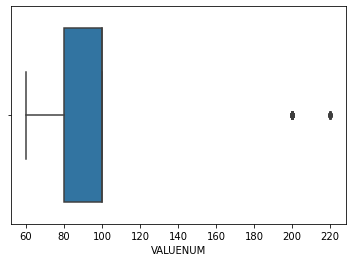

In [12]:
sns.boxplot(x=hrAlarmLowDF['VALUENUM'])

In [13]:
hrAlarmLowDF[hrAlarmLowDF.VALUENUM > 120].shape 

(114, 5)

In [16]:
## Replacing outliers with NaN 

boolean_condition = hrAlarmLowDF.VALUENUM > 120 
column_name = "VALUENUM"

hrAlarmLowDF.loc[boolean_condition, column_name] = np.nan

hrAlarmLowDF.to_csv(outlier_free_directory + 'hrAlarmLow.csv', index=False)

hrAlarmLowDF.isnull().sum()

subject_id      0
HADM_ID         0
CHARTTIME       0
VALUENUM      134
ADMITTIME       0
dtype: int64

<AxesSubplot:xlabel='VALUENUM'>

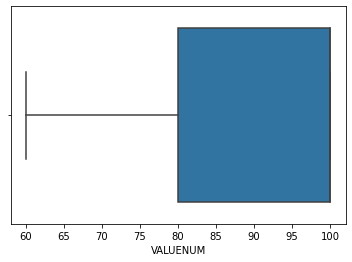

In [17]:
sns.boxplot(x=hrAlarmLowDF['VALUENUM'])

### SaO2 Alarm High

In [18]:
sao2AlarmHighDF[sao2AlarmHighDF.VALUENUM < 80].shape 

(22, 5)

In [19]:
## Replacing outliers with NaN 

boolean_condition = sao2AlarmHighDF.VALUENUM < 80 
column_name = "VALUENUM"

sao2AlarmHighDF.loc[boolean_condition, column_name] = np.nan

sao2AlarmHighDF.to_csv('Data/OutlierFreeData/sao2AlarmHigh.csv', index=False)

sao2AlarmHighDF.isnull().sum()

subject_id     0
HADM_ID        0
CHARTTIME      0
VALUENUM      22
ADMITTIME      0
dtype: int64

<AxesSubplot:xlabel='VALUENUM'>

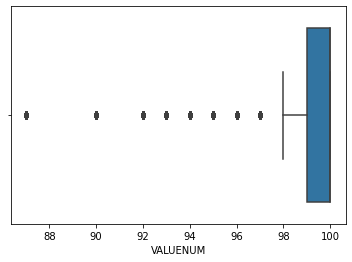

In [20]:
sns.boxplot(x=sao2AlarmHighDF['VALUENUM'])

### SaO2 Alarm Low 

<AxesSubplot:xlabel='VALUENUM'>

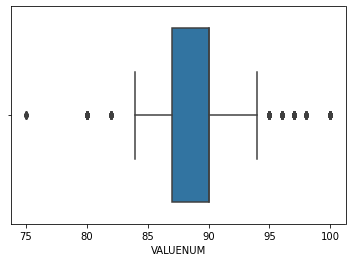

In [21]:
sns.boxplot(x=sao2AlarmLowDF['VALUENUM'])

In [22]:
sao2AlarmLowDF[sao2AlarmLowDF.VALUENUM < 85].shape 

(93, 5)

In [23]:
sao2AlarmLowDF.to_csv('Data/OutlierFreeData/sao2AlarmLow.csv', index=False)

### SkinTemperature

<AxesSubplot:xlabel='VALUENUM'>

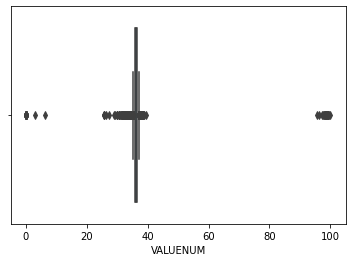

In [24]:
sns.boxplot(x=skinTemperatureDF['VALUENUM'])

In [25]:
skinTemperatureDF[skinTemperatureDF.VALUENUM < 25].shape 

(22, 5)

In [26]:
skinTemperatureDF[skinTemperatureDF.VALUENUM > 42].shape 

(31, 5)

In [27]:
## Replacing outliers with NaN 

boolean_condition1 = skinTemperatureDF.VALUENUM < 25
boolean_condition2 = skinTemperatureDF.VALUENUM > 42
column_name = "VALUENUM"

skinTemperatureDF.loc[boolean_condition1, column_name] = np.nan
skinTemperatureDF.loc[boolean_condition2, column_name] = np.nan

skinTemperatureDF.to_csv('Data/OutlierFreeData/skinTemperature.csv', index=False)

skinTemperatureDF.isnull().sum()

subject_id       0
HADM_ID          0
CHARTTIME        0
VALUENUM      1030
ADMITTIME        0
dtype: int64

<AxesSubplot:xlabel='VALUENUM'>

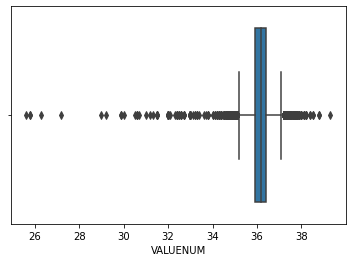

In [28]:
sns.boxplot(x=skinTemperatureDF['VALUENUM'])

### Temperature 

<AxesSubplot:xlabel='VALUENUM'>

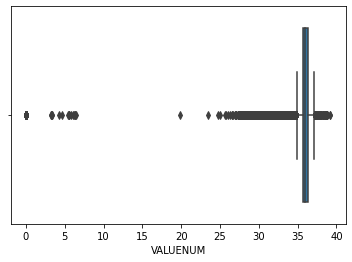

In [29]:
sns.boxplot(x=temperatureDF['VALUENUM'])

In [30]:
## Replacing outliers with NaN 

boolean_condition = temperatureDF.VALUENUM < 25
column_name = "VALUENUM"

temperatureDF.loc[boolean_condition, column_name] = np.nan

temperatureDF.to_csv('Data/OutlierFreeData/temperature.csv', index=False)

temperatureDF.isnull().sum()

subject_id      0
HADM_ID         0
CHARTTIME       0
VALUENUM      527
ADMITTIME       0
dtype: int64

<AxesSubplot:xlabel='VALUENUM'>

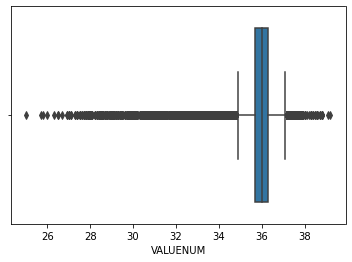

In [31]:
sns.boxplot(x=temperatureDF['VALUENUM'])

### BP Cuff Diastolic 

<AxesSubplot:xlabel='VALUENUM'>

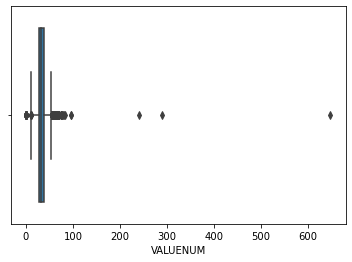

In [32]:
sns.boxplot(x=bpCuffDiastolicDF['VALUENUM'])

In [33]:
bpCuffDiastolicDF[bpCuffDiastolicDF.VALUENUM > 200].shape 

(3, 5)

In [34]:
## Replacing outliers with NaN 

boolean_condition = bpCuffDiastolicDF.VALUENUM > 200
column_name = "VALUENUM"

bpCuffDiastolicDF.loc[boolean_condition, column_name] = np.nan

bpCuffDiastolicDF.to_csv('Data/OutlierFreeData/bpCuffDiastolic.csv', index=False)

bpCuffDiastolicDF.isnull().sum()

subject_id    0
HADM_ID       0
CHARTTIME     0
VALUENUM      3
ADMITTIME     0
dtype: int64

<AxesSubplot:xlabel='VALUENUM'>

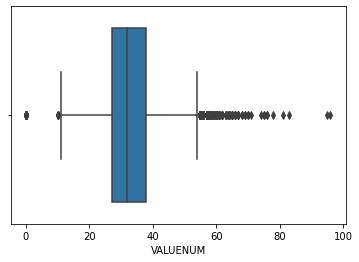

In [35]:
sns.boxplot(x=bpCuffDiastolicDF['VALUENUM'])

### BP Cuff Mean 

<AxesSubplot:xlabel='VALUENUM'>

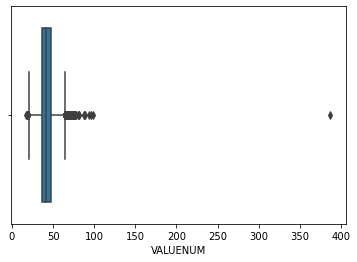

In [36]:
sns.boxplot(x=bpCuffMeanDF['VALUENUM'])

In [38]:
bpCuffMeanDF[bpCuffMeanDF.VALUENUM > 100].shape 

(1, 5)

In [39]:
## Replacing outliers with NaN 

boolean_condition = bpCuffMeanDF.VALUENUM > 100
column_name = "VALUENUM"

bpCuffMeanDF.loc[boolean_condition, column_name] = np.nan

bpCuffMeanDF.to_csv('Data/OutlierFreeData/bpCuffMean.csv', index=False)

bpCuffMeanDF.isnull().sum()

subject_id     0
HADM_ID        0
CHARTTIME      0
VALUENUM      81
ADMITTIME      0
dtype: int64

### BP Cuff Systolic

<AxesSubplot:xlabel='VALUENUM'>

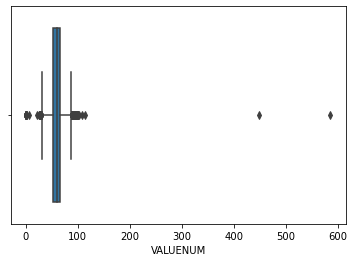

In [40]:
sns.boxplot(x=bpCuffSystolicDF['VALUENUM'])

In [41]:
bpCuffSystolicDF[bpCuffSystolicDF.VALUENUM > 200].shape 

(2, 5)

In [42]:
## Replacing outliers with NaN 

boolean_condition = bpCuffSystolicDF.VALUENUM > 200
column_name = "VALUENUM"

bpCuffSystolicDF.loc[boolean_condition, column_name] = np.nan

bpCuffSystolicDF.to_csv('Data/OutlierFreeData/bpCuffSystolic.csv', index=False)

bpCuffSystolicDF.isnull().sum()

subject_id      0
HADM_ID         0
CHARTTIME       0
VALUENUM      113
ADMITTIME       0
dtype: int64

<AxesSubplot:xlabel='VALUENUM'>

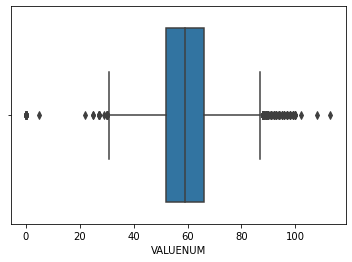

In [43]:
sns.boxplot(x=bpCuffSystolicDF['VALUENUM'])

## Glucometer 

<AxesSubplot:xlabel='VALUENUM'>

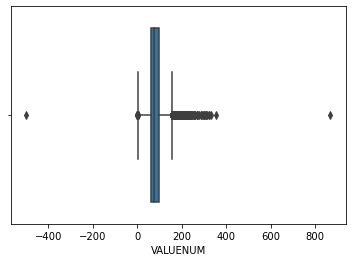

In [44]:
sns.boxplot(x=glucometerDF['VALUENUM'])

In [45]:
## Replacing outliers with NaN 

boolean_condition1 = glucometerDF.VALUENUM > 400
boolean_condition2 = glucometerDF.VALUENUM < 0
column_name = "VALUENUM"

glucometerDF.loc[boolean_condition1, column_name] = np.nan
glucometerDF.loc[boolean_condition2, column_name] = np.nan

glucometerDF.to_csv('Data/OutlierFreeData/glucometer.csv', index=False)

glucometerDF.isnull().sum()

subject_id     0
HADM_ID        0
CHARTTIME      0
VALUENUM      69
ADMITTIME      0
dtype: int64